In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator
from scipy.interpolate import splrep, splev, splprep, interp1d
from scipy.optimize import curve_fit
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
import I_n_P as P
from importlib import reload
plt.style.use('ggplot')
path = 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF'
prop = fm.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [2]:
reload(P)

<module 'I_n_P' from 'C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\I_n_P.py'>

In [3]:
'''Read in all values.'''
_, Bp, B = P.magnetic_read()
angle, eq, tur = P.particle_exb_read()
sa, shear = P.shear_read()

In [4]:
'''Making two y-axes having common zero.'''
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

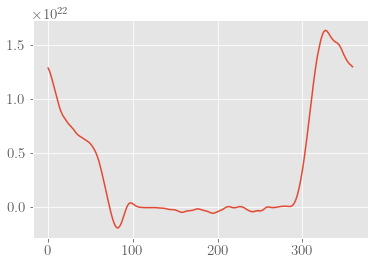

In [5]:
plt.plot(angle,tur)
#plt.plot([x for x in range(-180,180)],np.roll(tur,180))
plt.show()

In [6]:
shear_int = P.angle_interp(sa,shear,1,smo=False)

In [7]:
shear_int.shape

(360,)

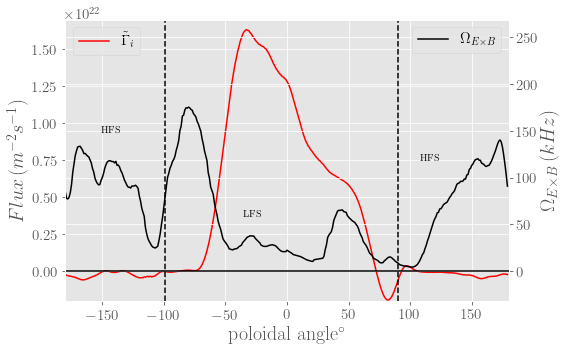

In [8]:
'''Shear vs. turbulent flux.'''
fig,ax1 = plt.subplots(figsize=(8, 5))
ax1.plot([x for x in range(-180,180)],np.roll(tur,180),'r',label=r'$\tilde{\Gamma}_i$')
#ax1.plot([x for x in range(-180,180)],np.roll(i_tur,180),'b',label=r'$\tilde{Q}_i$')
#ax1.plot([x for x in range(-180,180)],np.roll(e_tur,180),'r',label=r'$\tilde{Q}_e$')
ax2 = ax1.twinx()
#ax2.plot([x for x in range(-180,180)],np.roll(shear,180),'k',label=r'$\Omega_{E\times B}$')
ax2.plot([x for x in range(-180,180)],np.roll(shear_int,180),'k',label=r'$\Omega_{E\times B}$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.4, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.8, 0.5),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.08, 0.6),textcoords='axes fraction')
ax1.set_xlabel(r'poloidal angle$^{\circ}$')
ax1.set_xlim(-180,180)
ax1.set_ylim(-0.2e22,1.7e22)
ax2.set_ylim(-100,200)
ax1.yaxis.set_label_position("left")
ax1.set_ylabel(r'$Flux\, (m^{-2}s^{-1})$')
ax2.set_ylabel(r'$\Omega_{E\times B} \,(kHz)$')
align_yaxis(ax1, 0, ax2, 0)
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

In [9]:
file = open("ti262_shear_tur(fig2.d).txt",'a')
file.write("Ang."+"\t"+"shear"+"\t"+"tur.flux"+"\n")
for i in range(0,360):
    file.write(str(i)+"\t"+str(shear_int[i])+"\t"+str(tur[i])+"\n")
file.close()    